In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

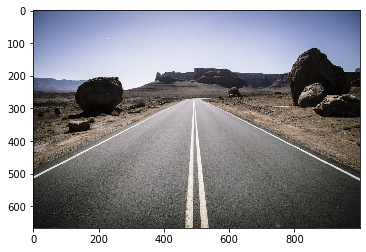

In [2]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [3]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(666, 1000, 3)


In [4]:
region_of_interest_vertices = [(0,666),(0,495),(425,280),(550,280),(1000,495),(1000,666)]

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

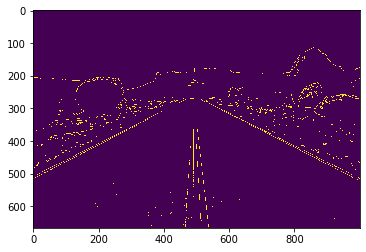

In [6]:
canny_image = cv2.Canny(gray_image, 300, 400)
plt.imshow(canny_image)
plt.show()

In [7]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

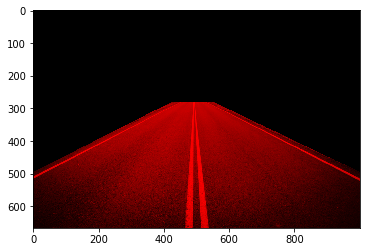

In [8]:
cropped_image = region_of_interest(image,
                                  np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)
plt.show()

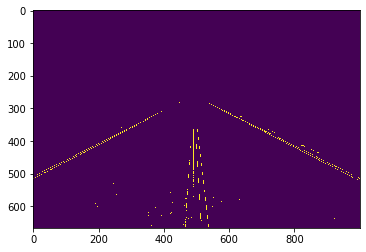

In [9]:
cropped_canny_image = region_of_interest(canny_image,
                                  np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_canny_image)
plt.show()

In [10]:
lines = cv2.HoughLinesP(cropped_canny_image, rho = 1, theta = np.pi/180, threshold = 100, lines = np.array([]),
                       minLineLength = 50, maxLineGap = 60)

In [11]:
def draw_line(img, lines):
    img = np.copy(img)
    blank_img = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_img,(x1,y1),(x2,y2),(0,255,0), thickness = 10)
    
    img = cv2.addWeighted(img, 0.9, blank_img, 1, 0.0)
    
    return img

<function matplotlib.pyplot.show(*args, **kw)>

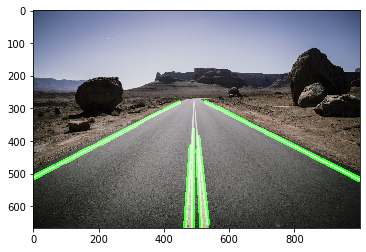

In [12]:
lane_detected_image = draw_line(image,lines)
plt.imshow(lane_detected_image)
plt.show

In [13]:
cv2.imwrite('lane_detected_img.png',lane_detected_image)

True